# Determines
The datasets include transactions with credit cards by European cardholders in September 2013. This dataset presents transactions that took place within two days, of which 492 out of 284,807 transactions were fraudulent. The dataset is highly unstable, with the positive class (fraud) accounting for 0.172% of all transactions.

Feature Information:

Time: This property includes the seconds between each operation in the dataset and the first operation.

Amount: This feature is the Amount transaction, for example it can be used for cost sensitive learning.

Class: This property is the target variable and takes the value 1 in case of fraud and 0 otherwise.

The purpose of this project is to predict whether a credit card transaction is fraudulent.

# Tasks

#### 1. Exploratory Data Analysis & Data Cleaning

- Import Modules, Load Data & Data Review
- Exploratory Data Analysis
- Data Cleaning



    
#### 2. Data Preprocessing

- Scaling
- Train - Test Split


#### 3. Model Building

- Logistic Regression without SMOTE
- Apply SMOTE
- Logistic Regression with SMOTE
- Random Forest Classifier with SMOTE
- Neural Network

#### 4. Model Deployement

- Save and Export the Model as .pkl
- Save and Export Variables as .pkl 




## 1. Exploratory Data Analysis & Data Cleaning

### Import Modules, Load Data & Data Review

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import skew
import warnings
warnings.filterwarnings('ignore')

# Libraries for Style
from colorama import Fore, Style
from yellowbrick.style import set_palette
set_palette('flatui')

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10,6)
# pd.set_option('display.max_columns', 100)
# pd.set_option('display.max_rows', 150)
pd.set_option('display.float_format', '{:.3f}'.format)

In [4]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000,-1.360,-0.073,2.536,1.378,-0.338,0.462,0.240,0.099,0.364,...,-0.018,0.278,-0.110,0.067,0.129,-0.189,0.134,-0.021,149.620,0
1,0.000,1.192,0.266,0.166,0.448,0.060,-0.082,-0.079,0.085,-0.255,...,-0.226,-0.639,0.101,-0.340,0.167,0.126,-0.009,0.015,2.690,0
2,1.000,-1.358,-1.340,1.773,0.380,-0.503,1.800,0.791,0.248,-1.515,...,0.248,0.772,0.909,-0.689,-0.328,-0.139,-0.055,-0.060,378.660,0
3,1.000,-0.966,-0.185,1.793,-0.863,-0.010,1.247,0.238,0.377,-1.387,...,-0.108,0.005,-0.190,-1.176,0.647,-0.222,0.063,0.061,123.500,0
4,2.000,-1.158,0.878,1.549,0.403,-0.407,0.096,0.593,-0.271,0.818,...,-0.009,0.798,-0.137,0.141,-0.206,0.502,0.219,0.215,69.990,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.shape, df.size

((284807, 31), 8829017)

In [7]:
print('Missing Value   : ', df.isnull().sum().sum())
print('Duplicated Rows : ', df.duplicated().sum())

Missing Value   :  0
Duplicated Rows :  1081


In [8]:
df[df.duplicated(keep='first')==True].Class.value_counts()
# Since the dataset is highly unbalanced, we will keep duplicated observes

0    1062
1      19
Name: Class, dtype: int64

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.000,94813.860,47488.146,0.000,54201.500,84692.000,139320.500,172792.000
V1,284807.000,0.000,1.959,-56.408,-0.920,0.018,1.316,2.455
V2,284807.000,0.000,1.651,-72.716,-0.599,0.065,0.804,22.058
V3,284807.000,-0.000,1.516,-48.326,-0.890,0.180,1.027,9.383
V4,284807.000,0.000,1.416,-5.683,-0.849,-0.020,0.743,16.875
V5,284807.000,-0.000,1.380,-113.743,-0.692,-0.054,0.612,34.802
V6,284807.000,0.000,1.332,-26.161,-0.768,-0.274,0.399,73.302
V7,284807.000,-0.000,1.237,-43.557,-0.554,0.040,0.570,120.589
V8,284807.000,-0.000,1.194,-73.217,-0.209,0.022,0.327,20.007
V9,284807.000,-0.000,1.099,-13.434,-0.643,-0.051,0.597,15.595


### Exploratory Data Analysis

***class***

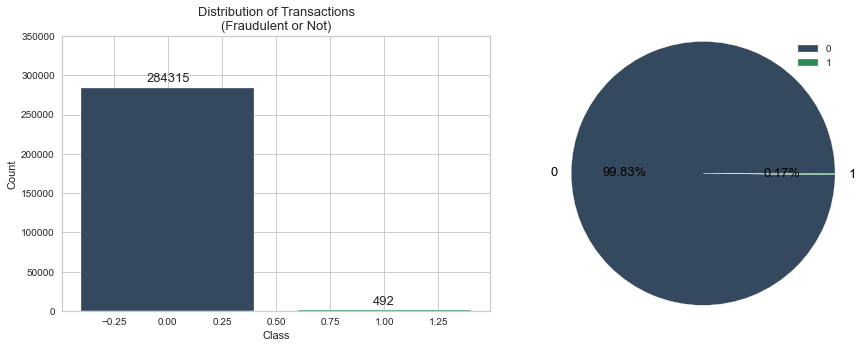

In [10]:
plt.figure(figsize=(13,5))

x = df['Class'].value_counts().index
y = df['Class'].value_counts().values

plt.subplot(121)
g = plt.bar(x, y, label='Class', color=['#34495E','seagreen'])
plt.bar_label(g, padding=3, size=13), plt.ylim(0, 350000)

plt.xlabel('Class'), plt.ylabel('Count') 
plt.title('Distribution of Transactions\n(Fraudulent or Not)', size=13)
   
plt.subplot(122)
plt.pie(y, labels=x, autopct='%0.2f%%', radius=1.2, textprops={'color':'black','fontsize': 13}, 
        colors=['#34495E','seagreen'])
plt.legend()

plt.tight_layout();

In [11]:
print('Number of fraudulent transactions = %d or %d per 100,000 transactions in the dataset'
      %(len(df[df.Class==1]), len(df[df.Class==1])/len(df)*100000))

Number of fraudulent transactions = 492 or 172 per 100,000 transactions in the dataset


***amount***

In [12]:
nonfraud = df[df.Class==0]
fraud = df[df.Class==1]

print("Total Amount\t\t   : ", np.round(df.Amount.sum(), decimals=2))
print("Fraud Amount\t\t   : ", np.round(fraud.Amount.sum(), decimals=2))
print("Non-Fraud Amount\t   : ", np.round(nonfraud.Amount.sum(), decimals=2))
print("Percentage of Fraud Amount : ", np.round((fraud.Amount.sum()/df.Amount.sum())*100, decimals=2))

Total Amount		   :  25162590.01
Fraud Amount		   :  60127.97
Non-Fraud Amount	   :  25102462.04
Percentage of Fraud Amount :  0.24


<AxesSubplot:xlabel='Amount'>

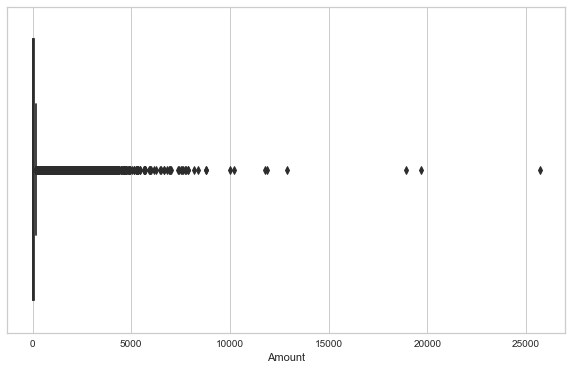

In [13]:
sns.boxplot(data=df, x='Amount')

***numeric columns***

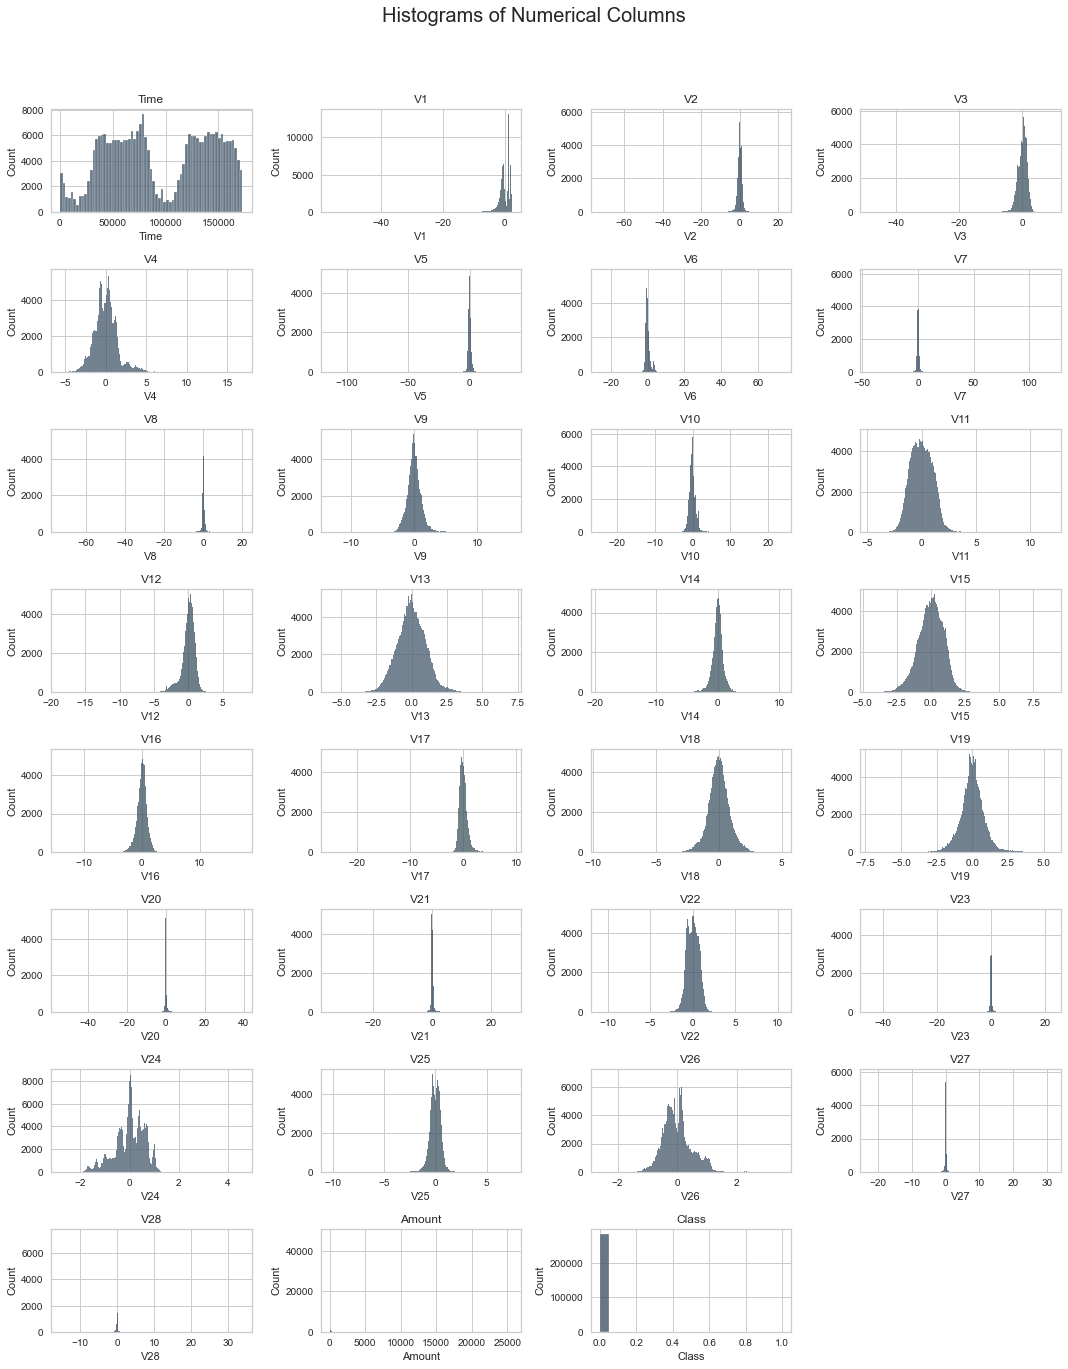

In [15]:
## Histograms
fig = plt.figure(figsize=(15, 20))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(df.shape[1]):
    plt.subplot(8, 4, i+1)
    f = plt.gca()
    f.set_title(df.columns.values[i])                                     
    sns.histplot(df.iloc[:, i])
    
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

***Correlations***

<AxesSubplot:>

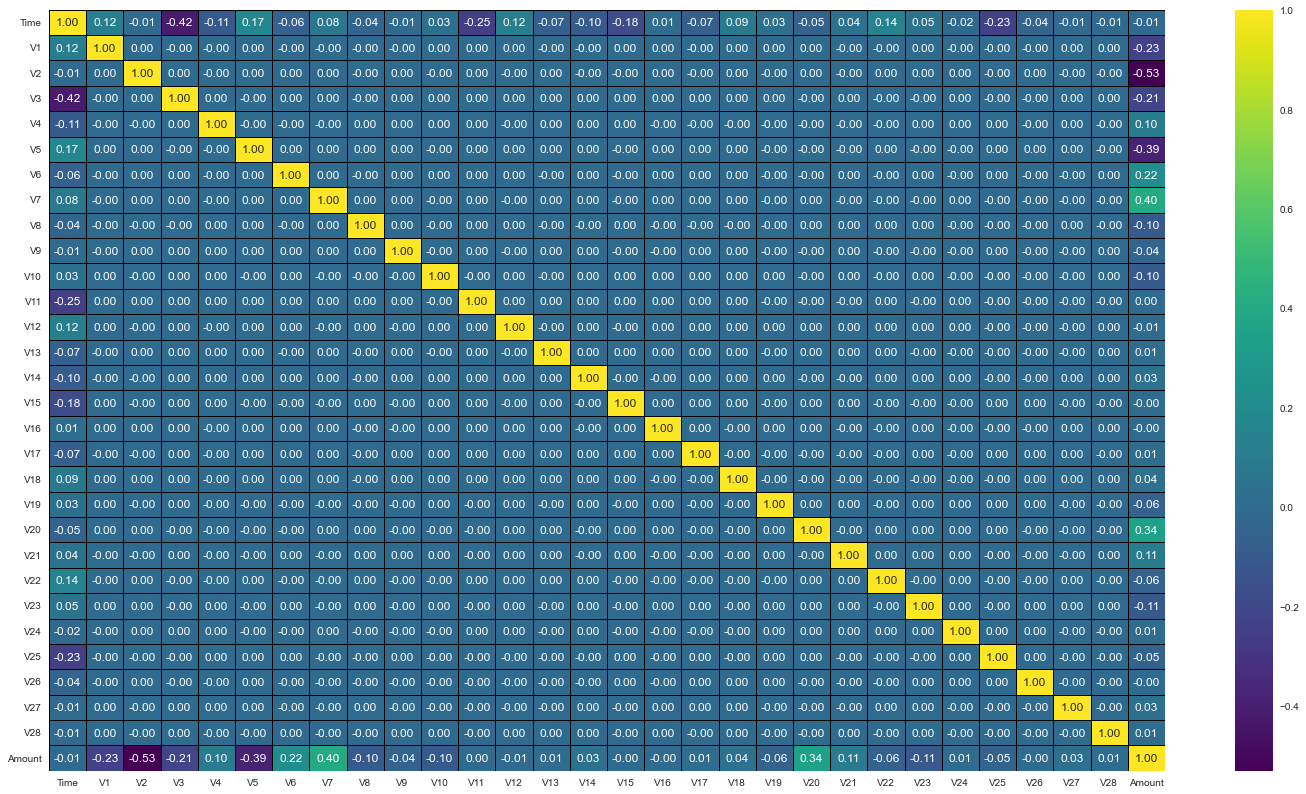

In [16]:
plt.figure(figsize=(25, 14))
sns.heatmap(df.drop('Class',1).corr(), annot=True, cmap='viridis', linewidth=1, linecolor='black', fmt='.2f')

<AxesSubplot:>

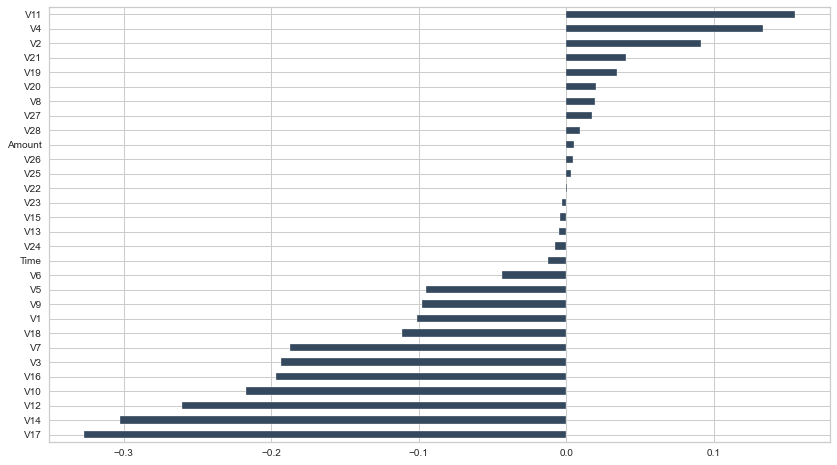

In [17]:
plt.figure(figsize=(14, 8))
df.corr()['Class'].drop('Class').sort_values().plot(kind='barh')

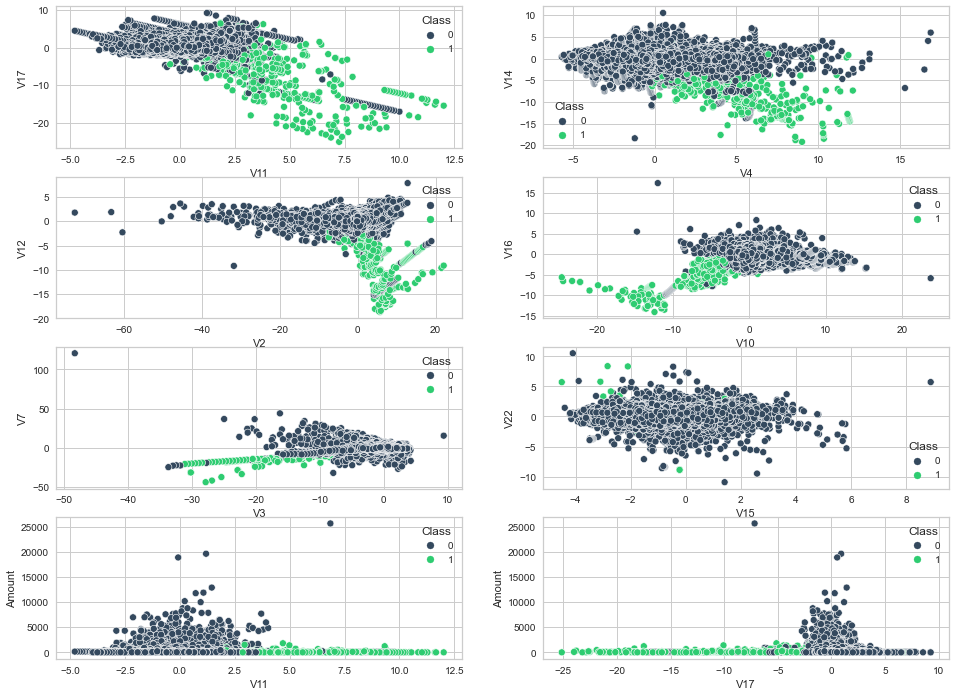

In [18]:
# SAMPLES
fig, ax = plt.subplots(4,2, figsize=(16,12))
sns.scatterplot(df.V11, df.V17, hue=df.Class, ax=ax[0,0])
sns.scatterplot(df.V4, df.V14, hue=df.Class, ax=ax[0,1])
sns.scatterplot(df.V2, df.V12, hue=df.Class, ax=ax[1,0])
sns.scatterplot(df.V10, df.V16, hue=df.Class, ax=ax[1,1])
sns.scatterplot(df.V3, df.V7, hue=df.Class, ax=ax[2,0])
sns.scatterplot(df.V15, df.V22, hue=df.Class, ax=ax[2,1])
sns.scatterplot(df.V11, df.Amount, hue=df.Class, ax=ax[3,0])
sns.scatterplot(df.V17, df.Amount, hue=df.Class, ax=ax[3,1]);

### Data Cleaning
Check Missing Values and Outliers

In [19]:
# OUTLIERS

iqr_factor = [1.5, 2]
list1, list2 = [], []

for factor in iqr_factor:
    count = 0
    print(f'Outliers for {factor} IQR :')
    print('-------------------------------------')
    for col in df.select_dtypes(['int64', 'float64']):
    
        IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
        lower_lim = df[col].quantile(0.25) - factor*IQR
        upper_lim = df[col].quantile(0.75) + factor*IQR
    
        cond = df[(df[col] < lower_lim) | (df[col] > upper_lim)].shape[0]
        
        if cond > 0 and factor == 1.5:
            list1.append(df[(df[col] < lower_lim) | (df[col] > upper_lim)].index.tolist())
        elif cond > 0 and factor == 2:
            list2.append(df[(df[col] < lower_lim) | (df[col] > upper_lim)].index.tolist())
        
        if cond > 0: print(f'{col:<10} : ', cond); count += cond
    print(f'\n{Fore.BLUE}TOTAL OUTLIERS FOR {factor} IQR : {count}{Style.RESET_ALL}')
    print('')

Outliers for 1.5 IQR :
-------------------------------------
V1         :  7062
V2         :  13526
V3         :  3363
V4         :  11148
V5         :  12295
V6         :  22965
V7         :  8948
V8         :  24134
V9         :  8283
V10        :  9496
V11        :  780
V12        :  15348
V13        :  3368
V14        :  14149
V15        :  2894
V16        :  8184
V17        :  7420
V18        :  7533
V19        :  10205
V20        :  27770
V21        :  14497
V22        :  1317
V23        :  18541
V24        :  4774
V25        :  5367
V26        :  5596
V27        :  39163
V28        :  30342
Amount     :  31904
Class      :  492

TOTAL OUTLIERS FOR 1.5 IQR : 370864

Outliers for 2 IQR :
-------------------------------------
V1         :  4432
V2         :  8960
V3         :  1816
V4         :  4736
V5         :  6037
V6         :  19016
V7         :  5809
V8         :  17311
V9         :  2969
V10        :  5766
V11        :  334
V12        :  8259
V13        :  401
V14        : 

In [ ]:
# we will scale numeric columns

---
---


## 2. Data Preprocessing

In [20]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler,OrdinalEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split

#### Scaling

In [ ]:
# data will be scaled through a pipeline

#### Train - Test Split

As in this case, for extremely imbalanced datasets you may want to make sure that classes are balanced across train and test data.

In [21]:
X = df.drop(['Time','Class'], axis=1)
y = df['Class']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=1)

In [23]:
y_train.value_counts(), y_test.value_counts()

(0    227451
 1       394
 Name: Class, dtype: int64,
 0    56864
 1       98
 Name: Class, dtype: int64)

---
---


## 3. Model Building
It was previously stated that you need to make class prediction with three different algorithms. As in this case, different approaches are required to obtain better performance on unbalanced data.

This dataset is severely **unbalanced** (most of the transactions are non-fraud). So the algorithms are much more likely to classify new observations to the majority class and high accuracy won't tell us anything. To address the problem of imbalanced dataset we can use undersampling and oversampling data approach techniques. Oversampling increases the number of minority class members in the training set. The advantage of oversampling is that no information from the original training set is lost unlike in undersampling, as all observations from the minority and majority classes are kept. On the other hand, it is prone to overfitting. 

There is a type of oversampling called **[SMOTE](https://www.geeksforgeeks.org/ml-handling-imbalanced-data-with-smote-and-near-miss-algorithm-in-python/)** (Synthetic Minority Oversampling Technique), which we are going to use to make our dataset balanced. It creates synthetic points from the minority class.

- It is important that you can evaluate the effectiveness of SMOTE. For this reason, implement the Logistic Regression algorithm in two different ways, with SMOTE applied and without.

***Note***: 

- *Do not forget to import the necessary libraries and modules before starting the model building!*

- *If you are going to use the cross validation method to be more sure of the performance of your model for unbalanced data, you should make sure that the class distributions in the iterations are equal. For this case, you should use **[StratifiedKFold](https://www.analyseup.com/python-machine-learning/stratified-kfold.html)** instead of regular cross validation method.*

In [24]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

### Logistic Regression without SMOTE

- The steps you are going to cover for this algorithm are as follows: 

   i. Import Libraries
   
   *ii. Model Training*
   
   *iii. Prediction and Model Evaluating*
   
   *iv. Plot Precision and Recall Curve*
   
   *v. Apply and Plot StratifiedKFold*

***i. Import Libraries***

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold, GridSearchCV

from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
from sklearn.metrics import accuracy_score, f1_score,recall_score,precision_score
from sklearn.metrics import average_precision_score,precision_recall_curve,plot_precision_recall_curve

from yellowbrick.classifier import PrecisionRecallCurve
from yellowbrick.classifier import ClassPredictionError

***ii. Model Training***

In [26]:
log_model = make_pipeline(RobustScaler(), LogisticRegression(class_weight={1:25, 0:1}, random_state=101, 
                                                             penalty='l1', C=0.002, solver='saga'))
log_model.fit(X_train, y_train)

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.002, class_weight={0: 1, 1: 25},
                                    penalty='l1', random_state=101,
                                    solver='saga'))])

In [27]:
eval_metric(log_model, X_train, y_train, X_test, y_test)

Test_Set
[[56835    29]
 [   10    88]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.75      0.90      0.82        98

    accuracy                           1.00     56962
   macro avg       0.88      0.95      0.91     56962
weighted avg       1.00      1.00      1.00     56962


Train_Set
[[227324    127]
 [    76    318]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.71      0.81      0.76       394

    accuracy                           1.00    227845
   macro avg       0.86      0.90      0.88    227845
weighted avg       1.00      1.00      1.00    227845



In [28]:
# CROSS VALIDATION

model = make_pipeline(RobustScaler(), LogisticRegression(class_weight={1:25, 0:1}, random_state=101, 
                                                         penalty='l1', C=0.002, solver='saga'))

scores = cross_validate(model, X_train, y_train, scoring=['accuracy','precision','recall','f1'], cv=5)

df_scores = pd.DataFrame(scores, index=range(1,6))
df_scores.mean()[2:]

test_accuracy    0.999
test_precision   0.728
test_recall      0.804
test_f1          0.763
dtype: float64

***finding optimal threshold value***

In [29]:
log_model = make_pipeline(RobustScaler(), LogisticRegression(class_weight={1:25, 0:1}, random_state=101, 
                                                             penalty='l1', C=0.002, solver='saga'))
log_model.fit(X_train, y_train)

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.002, class_weight={0: 1, 1: 25},
                                    penalty='l1', random_state=101,
                                    solver='saga'))])

In [30]:
y_pred_proba = log_model.predict_proba(X_train)
precisions, recalls, thresholds = precision_recall_curve(y_train, y_pred_proba[:,1])

In [31]:
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.6644591358469185

In [32]:
# test scores
y_pred = pd.Series(log_model.predict_proba(X_test)[:,1]).apply(lambda x: 1 if x >= optimal_threshold else 0)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[56841    23]
 [   12    86]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.79      0.88      0.83        98

    accuracy                           1.00     56962
   macro avg       0.89      0.94      0.92     56962
weighted avg       1.00      1.00      1.00     56962



In [34]:
# train scores
y_train_pred = pd.Series(log_model.predict_proba(X_train)[:,1]).apply(lambda x: 1 if x >= optimal_threshold else 0)

print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

[[227366     85]
 [    81    313]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.79      0.79      0.79       394

    accuracy                           1.00    227845
   macro avg       0.89      0.90      0.90    227845
weighted avg       1.00      1.00      1.00    227845



***feature selection with shap***

In [35]:
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
model_shap = LogisticRegression(class_weight={1:25, 0:1}, random_state=101, penalty='l1', C=0.002, solver='saga')
model_shap.fit(X_train_scaled, y_train)

LogisticRegression(C=0.002, class_weight={0: 1, 1: 25}, penalty='l1',
                   random_state=101, solver='saga')

In [37]:
eval_metric(model_shap, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[56835    29]
 [   10    88]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.75      0.90      0.82        98

    accuracy                           1.00     56962
   macro avg       0.88      0.95      0.91     56962
weighted avg       1.00      1.00      1.00     56962


Train_Set
[[227324    127]
 [    76    318]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.71      0.81      0.76       394

    accuracy                           1.00    227845
   macro avg       0.86      0.90      0.88    227845
weighted avg       1.00      1.00      1.00    227845



In [38]:
import shap
explainer = shap.Explainer(model_shap, X_train_scaled)
shap_values = explainer.shap_values(X_test_scaled)

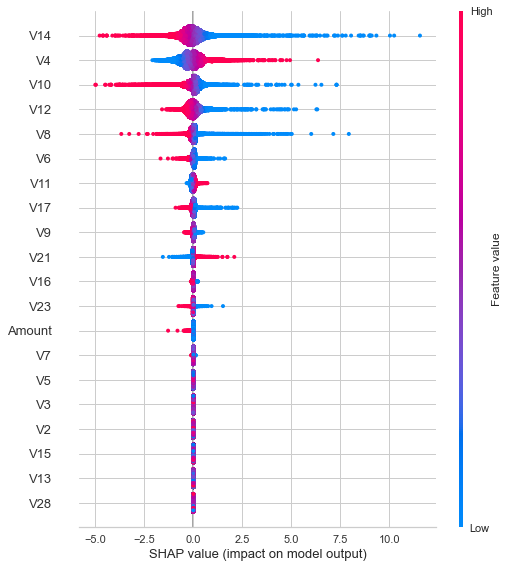

In [39]:
shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns)

In [40]:
fraud = ['V4','V6','V8','V10','V11','V12','V14','V17','V21','Amount']

In [41]:
X2 = df[fraud]
y = df['Class']

In [42]:
X2.shape

(284807, 10)

In [43]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.2, stratify=y, random_state=1)

In [44]:
log_model = make_pipeline(RobustScaler(), LogisticRegression(class_weight={1:25, 0:1}, random_state=101, 
                                                             penalty='l1', C=0.002, solver='saga'))
log_model.fit(X2_train, y2_train)

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.002, class_weight={0: 1, 1: 25},
                                    penalty='l1', random_state=101,
                                    solver='saga'))])

In [45]:
eval_metric(log_model, X2_train, y2_train, X2_test, y2_test)
# scores are very close compared with 30-featured data

Test_Set
[[56831    33]
 [   10    88]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.73      0.90      0.80        98

    accuracy                           1.00     56962
   macro avg       0.86      0.95      0.90     56962
weighted avg       1.00      1.00      1.00     56962


Train_Set
[[227308    143]
 [    73    321]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.69      0.81      0.75       394

    accuracy                           1.00    227845
   macro avg       0.85      0.91      0.87    227845
weighted avg       1.00      1.00      1.00    227845



***finding optimal threshold value for the new data***

In [46]:
y_pred_proba = log_model.predict_proba(X2_train)
precisions, recalls, thresholds = precision_recall_curve(y2_train, y_pred_proba[:,1])

In [47]:
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.752840377212115

In [48]:
# test scores
y_pred = pd.Series(log_model.predict_proba(X2_test)[:,1]).apply(lambda x: 1 if x >= optimal_threshold else 0)

print(confusion_matrix(y2_test,y_pred))
print(classification_report(y2_test,y_pred))

[[56843    21]
 [   12    86]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.80      0.88      0.84        98

    accuracy                           1.00     56962
   macro avg       0.90      0.94      0.92     56962
weighted avg       1.00      1.00      1.00     56962



In [50]:
# train scores
y_train_pred = pd.Series(log_model.predict_proba(X2_train)[:,1]).apply(lambda x: 1 if x >= optimal_threshold else 0)

print(confusion_matrix(y2_train, y_train_pred))
print(classification_report(y2_train, y_train_pred))

[[227367     84]
 [    87    307]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.79      0.78      0.78       394

    accuracy                           1.00    227845
   macro avg       0.89      0.89      0.89    227845
weighted avg       1.00      1.00      1.00    227845



***iii. Prediction and Model Evaluating***

In [51]:
log_model1 = make_pipeline(RobustScaler(), LogisticRegression(class_weight={1:25, 0:1}, random_state=101, 
                                                              penalty='l1', C=0.002, solver='saga'))
log_model1.fit(X2_train, y2_train)

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.002, class_weight={0: 1, 1: 25},
                                    penalty='l1', random_state=101,
                                    solver='saga'))])

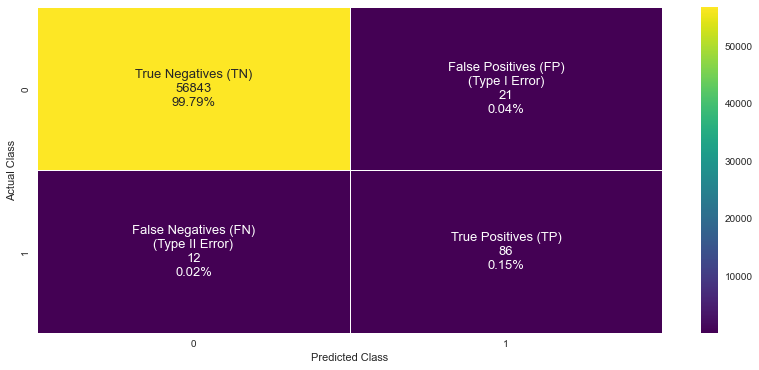

In [52]:
plt.figure(figsize=(14,6))

y_pred = pd.Series(log_model1.predict_proba(X2_test)[:,1]).apply(lambda x: 1 if x >= optimal_threshold else 0)
cf_matrix = confusion_matrix(y2_test, y_pred)

group_names = ['True Negatives (TN)', 'False Positives (FP)\n(Type I Error)', 
               'False Negatives (FN)\n(Type II Error)', 'True Positives (TP)']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]

labels = np.asarray(labels).reshape(2, 2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt="", annot_kws={'size': 13}, cmap='viridis', linewidth=1)
ax.set(xlabel='Predicted Class', ylabel = 'Actual Class');


You're evaluating "accuracy score"? Is your performance metric reflect real success? You may need to use different metrics to evaluate performance on unbalanced data. You should use **[precision and recall metrics](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#:~:text=The%20precision%2Drecall%20curve%20shows,a%20low%20false%20negative%20rate.)**.

***iv. Plot Precision and Recall Curve***


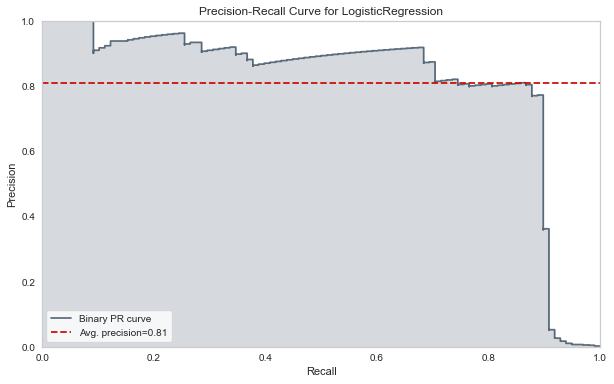

In [53]:
viz = PrecisionRecallCurve(log_model1)

viz.fit(X2_train, y2_train)
viz.score(X2_test, y2_test)
viz.show();

In [54]:
y_pred_proba = log_model1.predict_proba(X2_test)
average_precision_score(y2_test, y_pred_proba[:,1])

0.8101837965184903

***v. Apply and Plot StratifiedKFold***

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html

For unbalanced data, you should make sure that the class distributions in the iterations are equal. 
For this case, you should use StratifiedKFold instead of regular cross validation method.

In [55]:
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=101)

i=1
for train_index,test_index in skf.split(X2, y):
    print('{} of KFold {}'.format(i, skf.n_splits))
    X1_train, X1_test = X2.loc[train_index], X2.loc[test_index]
    y1_train, y1_test = y.loc[train_index], y.loc[test_index]
    
    model = make_pipeline(RobustScaler(), LogisticRegression(class_weight={1:25, 0:1}, random_state=101, 
                                                             penalty='l1', C=0.002, solver='saga'))
    model.fit(X1_train, y1_train)
    score = recall_score(y1_test, model.predict(X1_test))
    print(f'Recall Score: {score:.3f}')    
    i+=1

1 of KFold 5
Recall Score: 0.828
2 of KFold 5
Recall Score: 0.768
3 of KFold 5
Recall Score: 0.827
4 of KFold 5
Recall Score: 0.847
5 of KFold 5
Recall Score: 0.847


- Didn't the performance of the model you implemented above satisfy you? If your model is biased towards the majority class and minority class recall is not sufficient, apply **SMOTE**.

### Apply SMOTE

Different approaches are required to achieve better performance on unbalanced data.

This dataset is severely unstable (most transactions are not fraudulent). 
Therefore, algorithms are much more likely to classify new observations by majority class, and high accuracy tells us nothing. 
We can use undersampling and oversampling data approach techniques to address the unbalanced dataset problem. 
Oversampling increases the number of minority class members in the training set. 
The advantage of oversampling is that no information is lost from the original training set, unlike undersampling, as all observations from the minority and majority classes are retained. On the other hand, it is prone to overfitting.

In [56]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbpipeline

### Logistic Regression with SMOTE

- The steps you are going to cover for this algorithm are as follows:
   
   *i. Train-Test Split (Again)*
   
   *ii. Model Training*
   
   *iii. Prediction and Model Evaluating*
   
   *iv. Plot Precision and Recall Curve*
   
   *v. Apply and Plot StratifiedKFold*

***i. Train-Test Split (Again)***

Use SMOTE applied data.

In [57]:
over = SMOTE(sampling_strategy={1: 1450}, k_neighbors=3, random_state=1)
under = RandomUnderSampler(sampling_strategy={0: 3750}, random_state=1)

In [58]:
steps = [('o', over), ('u', under)]
pipeline = imbpipeline(steps=steps)

X_resampled, y_resampled = pipeline.fit_resample(X2_train, y2_train)

In [59]:
y_resampled.value_counts()

0    3750
1    1450
Name: Class, dtype: int64

***ii. Model Training***

In [60]:
# METHOD-1

operations = [('o', over), ('u', under), ("scaler", RobustScaler()), 
              ("log", LogisticRegression(random_state=101, penalty='l1', C=0.002, solver='saga'))]

smote_pipeline_log = imbpipeline(steps=operations)
smote_pipeline_log.fit(X2_train, y2_train)

Pipeline(steps=[('o',
                 SMOTE(k_neighbors=3, random_state=1,
                       sampling_strategy={1: 1450})),
                ('u',
                 RandomUnderSampler(random_state=1,
                                    sampling_strategy={0: 3750})),
                ('scaler', RobustScaler()),
                ('log',
                 LogisticRegression(C=0.002, penalty='l1', random_state=101,
                                    solver='saga'))])

In [61]:
eval_metric(smote_pipeline_log, X2_train, y2_train, X2_test, y2_test)

Test_Set
[[56844    20]
 [   12    86]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.81      0.88      0.84        98

    accuracy                           1.00     56962
   macro avg       0.91      0.94      0.92     56962
weighted avg       1.00      1.00      1.00     56962


Train_Set
[[227379     72]
 [    96    298]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.81      0.76      0.78       394

    accuracy                           1.00    227845
   macro avg       0.90      0.88      0.89    227845
weighted avg       1.00      1.00      1.00    227845



In [62]:
# METHOD-2

log_model2 = make_pipeline(RobustScaler(), LogisticRegression(random_state=101, penalty='l1', C=0.002, solver='saga'))
log_model2.fit(X_resampled, y_resampled)

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.002, penalty='l1', random_state=101,
                                    solver='saga'))])

In [63]:
eval_metric(log_model2, X2_train, y2_train, X2_test, y2_test)

Test_Set
[[56844    20]
 [   12    86]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.81      0.88      0.84        98

    accuracy                           1.00     56962
   macro avg       0.91      0.94      0.92     56962
weighted avg       1.00      1.00      1.00     56962


Train_Set
[[227379     72]
 [    96    298]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.81      0.76      0.78       394

    accuracy                           1.00    227845
   macro avg       0.90      0.88      0.89    227845
weighted avg       1.00      1.00      1.00    227845



***threshold for smote data***

In [64]:
y_pred_proba = smote_pipeline_log.predict_proba(X2_train)
precisions, recalls, thresholds = precision_recall_curve(y2_train, y_pred_proba[:,1])

In [65]:
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.4407763213892032

In [66]:
y_pred = pd.Series(smote_pipeline_log.predict_proba(X2_test)[:,1]).apply(lambda x: 1 if x >= optimal_threshold else 0)

print(confusion_matrix(y2_test,y_pred))
print(classification_report(y2_test,y_pred))

[[56842    22]
 [   12    86]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.80      0.88      0.83        98

    accuracy                           1.00     56962
   macro avg       0.90      0.94      0.92     56962
weighted avg       1.00      1.00      1.00     56962



***iii. Prediction and Model Evaluating***

In [67]:
operations = [('o', over), ('u', under), ("scaler", RobustScaler()), 
              ("log", LogisticRegression(random_state=101, penalty='l1', C=0.002, solver='saga'))]

smote_pipeline_log = imbpipeline(steps=operations)
smote_pipeline_log.fit(X2_train, y2_train)

Pipeline(steps=[('o',
                 SMOTE(k_neighbors=3, random_state=1,
                       sampling_strategy={1: 1450})),
                ('u',
                 RandomUnderSampler(random_state=1,
                                    sampling_strategy={0: 3750})),
                ('scaler', RobustScaler()),
                ('log',
                 LogisticRegression(C=0.002, penalty='l1', random_state=101,
                                    solver='saga'))])

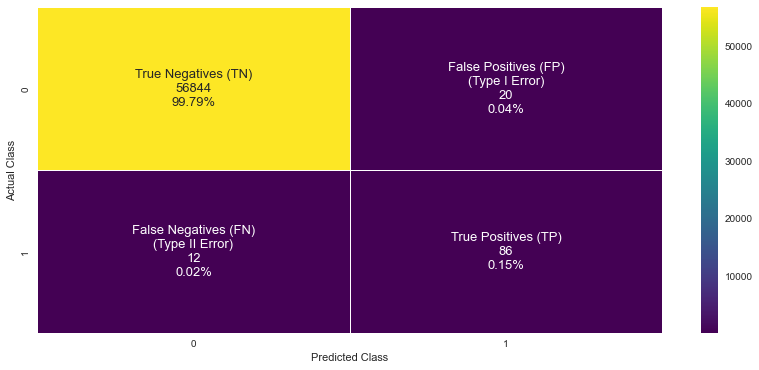

In [68]:
plt.figure(figsize=(14,6))

y_pred = smote_pipeline_log.predict(X2_test)
cf_matrix = confusion_matrix(y2_test, y_pred)

group_names = ['True Negatives (TN)', 'False Positives (FP)\n(Type I Error)', 
               'False Negatives (FN)\n(Type II Error)', 'True Positives (TP)']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]

labels = np.asarray(labels).reshape(2, 2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt="", annot_kws={'size': 13}, cmap='viridis', linewidth=1)
ax.set(xlabel='Predicted Class', ylabel = 'Actual Class');

***iv.  Plot Precision and Recall Curve***


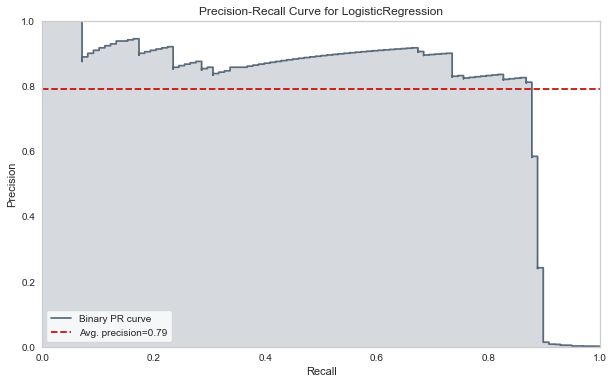

In [69]:
viz = PrecisionRecallCurve(smote_pipeline_log)

viz.fit(X2_train, y2_train)
viz.score(X2_test, y2_test)
viz.show();

In [70]:
y_pred_proba = smote_pipeline_log.predict_proba(X2_test)
average_precision_score(y2_test, y_pred_proba[:,1])

0.7904681595997581

***v. Apply and Plot StratifiedKFold***

In [71]:
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=101)

i=1
for train_index,test_index in skf.split(X2, y):
    print('{} of KFold {}'.format(i, skf.n_splits))
    X1_train, X1_test = X2.loc[train_index], X2.loc[test_index]
    y1_train, y1_test = y.loc[train_index], y.loc[test_index]
    
    operations = [('o', over), ('u', under), ("scaler", RobustScaler()), 
                  ("log", LogisticRegression(random_state=101, penalty='l1', C=0.002, solver='saga'))]
    model = imbpipeline(steps=operations)
    model.fit(X1_train, y1_train)
    score = recall_score(y1_test, model.predict(X1_test))
    print(f'Recall Score: {score:.3f}')    
    i+=1

1 of KFold 5
Recall Score: 0.778
2 of KFold 5
Recall Score: 0.717
3 of KFold 5
Recall Score: 0.786
4 of KFold 5
Recall Score: 0.796
5 of KFold 5
Recall Score: 0.786


***

### Random Forest Classifier

In [73]:
# scores for full data (with 30 features)
rf_model = RandomForestClassifier(class_weight={1:25, 0:1}, max_depth=5, random_state=101)
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 1, 1: 25}, max_depth=5,
                       random_state=101)

In [74]:
eval_metric(rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[56848    16]
 [   12    86]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.84      0.88      0.86        98

    accuracy                           1.00     56962
   macro avg       0.92      0.94      0.93     56962
weighted avg       1.00      1.00      1.00     56962


Train_Set
[[227395     56]
 [    66    328]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.85      0.83      0.84       394

    accuracy                           1.00    227845
   macro avg       0.93      0.92      0.92    227845
weighted avg       1.00      1.00      1.00    227845



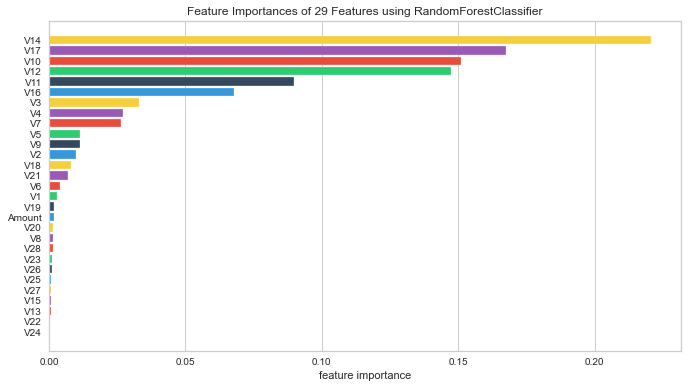

<AxesSubplot:title={'center':'Feature Importances of 29 Features using RandomForestClassifier'}, xlabel='feature importance'>

In [75]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

viz = FeatureImportances(rf_model, relative=False, labels=X.columns)
visualizer = RadViz(size=(700, 400))
viz.fit(X_train_scaled, y_train)
viz.show()

In [76]:
col = ['V3','V4','V7','V10','V11','V12','V14','V16','V17','Amount']

In [77]:
X3 = df[col]
y = df['Class']

In [78]:
X3.shape

(284807, 10)

In [79]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y, test_size=0.2, stratify=y, random_state=1)

In [80]:
rf_model = RandomForestClassifier(class_weight={1:25, 0:1}, max_depth=5, random_state=101)
rf_model.fit(X3_train, y3_train)

RandomForestClassifier(class_weight={0: 1, 1: 25}, max_depth=5,
                       random_state=101)

In [81]:
eval_metric(rf_model, X3_train, y3_train, X3_test, y3_test)

Test_Set
[[56845    19]
 [   11    87]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.82      0.89      0.85        98

    accuracy                           1.00     56962
   macro avg       0.91      0.94      0.93     56962
weighted avg       1.00      1.00      1.00     56962


Train_Set
[[227381     70]
 [    66    328]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.82      0.83      0.83       394

    accuracy                           1.00    227845
   macro avg       0.91      0.92      0.91    227845
weighted avg       1.00      1.00      1.00    227845



### Random Forest Classifier with SMOTE

- The steps you are going to cover for this algorithm are as follows:

   *i. Model Training*
   
   *ii. Prediction and Model Evaluating*
   
   *iii. Plot Precision and Recall Curve*
   
   *iv. Apply and Plot StratifiedKFold*
   

***i. Model Training***

In [82]:
over = SMOTE(sampling_strategy={1: 500}, k_neighbors=3, random_state=1)
under = RandomUnderSampler(sampling_strategy={0: 17000}, random_state=1)

In [84]:
operations = [('o', over), ('u', under), ('clf', RandomForestClassifier(max_depth=5, random_state=101))]

smote_pipeline_rf = imbpipeline(steps=operations)
smote_pipeline_rf.fit(X3_train, y3_train)

Pipeline(steps=[('o',
                 SMOTE(k_neighbors=3, random_state=1,
                       sampling_strategy={1: 500})),
                ('u',
                 RandomUnderSampler(random_state=1,
                                    sampling_strategy={0: 17000})),
                ('clf', RandomForestClassifier(max_depth=5, random_state=101))])

In [85]:
eval_metric(smote_pipeline_rf, X3_train, y3_train, X3_test, y3_test)

Test_Set
[[56835    29]
 [   11    87]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.75      0.89      0.81        98

    accuracy                           1.00     56962
   macro avg       0.87      0.94      0.91     56962
weighted avg       1.00      1.00      1.00     56962


Train_Set
[[227346    105]
 [    66    328]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.76      0.83      0.79       394

    accuracy                           1.00    227845
   macro avg       0.88      0.92      0.90    227845
weighted avg       1.00      1.00      1.00    227845



***ii. Prediction and Model Evaluating***

In [86]:
rf_model = RandomForestClassifier(class_weight={1:25, 0:1}, max_depth=5, random_state=101)
rf_model.fit(X3_train, y3_train)

RandomForestClassifier(class_weight={0: 1, 1: 25}, max_depth=5,
                       random_state=101)

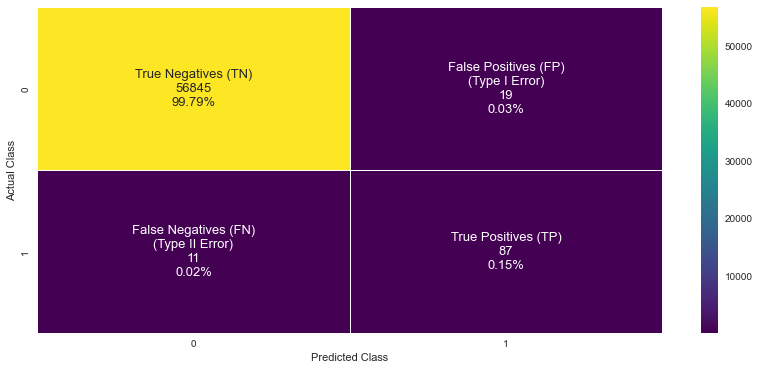

In [87]:
plt.figure(figsize=(14,6))

y_pred = rf_model.predict(X3_test)
cf_matrix = confusion_matrix(y3_test, y_pred)

group_names = ['True Negatives (TN)', 'False Positives (FP)\n(Type I Error)', 
               'False Negatives (FN)\n(Type II Error)', 'True Positives (TP)']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]

labels = np.asarray(labels).reshape(2, 2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt="", annot_kws={'size': 13}, cmap='viridis', linewidth=1)
ax.set(xlabel='Predicted Class', ylabel = 'Actual Class');

***iii. Plot Precision and Recall Curve***


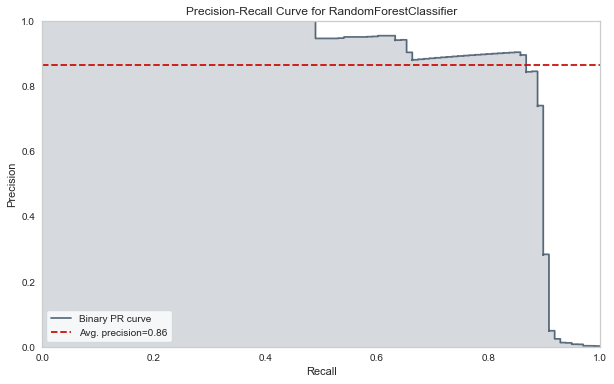

In [88]:
viz = PrecisionRecallCurve(rf_model)

viz.fit(X3_train, y3_train)
viz.score(X3_test, y3_test)
viz.show();

In [89]:
y_pred_proba = rf_model.predict_proba(X3_test)
average_precision_score(y3_test, y_pred_proba[:,1])

0.8648987442973246

***iv. Apply and Plot StratifiedKFold***

In [90]:
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=101)

i=1
for train_index,test_index in skf.split(X3, y):
    print('{} of KFold {}'.format(i, skf.n_splits))
    X1_train, X1_test = X3.loc[train_index], X3.loc[test_index]
    y1_train, y1_test = y.loc[train_index], y.loc[test_index]
    
    model = RandomForestClassifier(class_weight={1:25, 0:1}, max_depth=5, random_state=101)
    model.fit(X1_train, y1_train)
    score = recall_score(y1_test, model.predict(X1_test))
    print(f'Recall Score: {score:.3f}')    
    i+=1

1 of KFold 5
Recall Score: 0.838
2 of KFold 5
Recall Score: 0.727
3 of KFold 5
Recall Score: 0.827
4 of KFold 5
Recall Score: 0.837
5 of KFold 5
Recall Score: 0.827


### Neural Network

In the final step, I made classification with Neural Network which is a Deep Learning algorithm. 

Neural networks are a series of algorithms that mimic the operations of a human brain to recognize relationships between vast amounts of data. They are used in a variety of applications in financial services, from forecasting and marketing research to fraud detection and risk assessment.

A neural network contains layers of interconnected nodes. Each node is a perceptron and is similar to a multiple linear regression. The perceptron feeds the signal produced by a multiple linear regression into an activation function that may be nonlinear.

In a multi-layered perceptron (MLP), perceptrons are arranged in interconnected layers. The input layer collects input patterns. The output layer has classifications or output signals to which input patterns may map. 

Hidden layers fine-tune the input weightings until the neural network’s margin of error is minimal. It is hypothesized that hidden layers extrapolate salient features in the input data that have predictive power regarding the outputs.

- The steps you are going to cover for this algorithm are as follows:

   *i. Import Libraries*
   
   *ii. Define Model*
    
   *iii. Compile Model*
   
   *iv. Fit Model*
   
   *v. Prediction and Model Evaluating*
   
   *vi. Plot Precision and Recall Curve*

***i. Import Libraries***

In [91]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

from sklearn.utils import class_weight

In [92]:
tf.__version__

'2.8.0'

In [93]:
col = ['V3','V4','V7','V10','V11','V12','V14','V16','V17','Amount']

In [94]:
X = df[col]
y = df['Class'].values

In [101]:
seed = 42

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.20, random_state=seed)

In [103]:
print("Train features shape : ", X_train.shape)
print("Test features shape  : ", X_test.shape)

Train features shape :  (227845, 10)
Test features shape  :  (56962, 10)


In [104]:
scaler = MinMaxScaler()

In [105]:
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

***ii. Define Model***

Batch normalization is a technique for training very deep neural networks that standardizes the inputs to a layer for each mini-batch.
This has the effect of stabilizing the learning process and dramatically reducing the number of training epochs required to train deep networks.

In [106]:
tf.random.set_seed(42)

model = Sequential()

model.add(Dense(64, input_dim = X_train.shape[1]))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(32))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(16))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(1, activation='sigmoid'))

***iii. Compile Model***

In [107]:
opt = Adam(lr = 0.005)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['Recall'])

***iv. Fit Model***

In [108]:
early_stop=EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [109]:
model.fit(X_train, y_train, validation_split=0.1, batch_size=128, epochs=200, verbose=1, callbacks=[early_stop])

Epoch 1/200
1603/1603 [==============================] - 7s 3ms/step - loss: 0.0153 - recall: 0.7221 - val_loss: 0.0025 - val_recall: 0.8667
Epoch 2/200
1603/1603 [==============================] - 3s 2ms/step - loss: 0.0035 - recall: 0.7593 - val_loss: 0.0024 - val_recall: 0.8889
Epoch 3/200
1603/1603 [==============================] - 3s 2ms/step - loss: 0.0034 - recall: 0.7650 - val_loss: 0.0030 - val_recall: 0.8222
Epoch 4/200
1603/1603 [==============================] - 3s 2ms/step - loss: 0.0035 - recall: 0.7393 - val_loss: 0.0024 - val_recall: 0.8667
Epoch 5/200
1603/1603 [==============================] - 4s 3ms/step - loss: 0.0034 - recall: 0.7622 - val_loss: 0.0023 - val_recall: 0.8667
Epoch 6/200
1603/1603 [==============================] - 4s 3ms/step - loss: 0.0032 - recall: 0.7679 - val_loss: 0.0033 - val_recall: 0.8889
Epoch 7/200
1603/1603 [==============================] - 5s 3ms/step - loss: 0.0033 - recall: 0.7794 - val_loss: 0.0022 - val_recall: 0.8667
Epoch 8/200
1

***v. Prediction and Model Evaluating***

<AxesSubplot:>

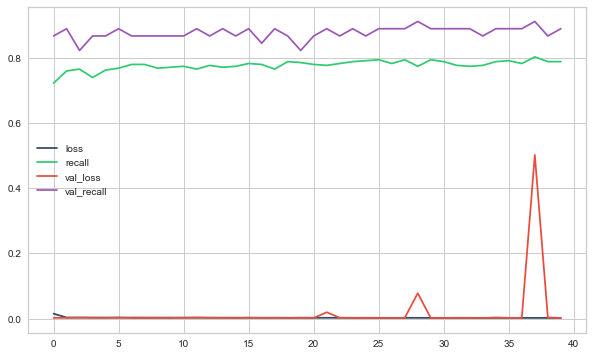

In [110]:
loss_df=pd.DataFrame(model.history.history)
loss_df.plot()

In [111]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.0028920809272676706
recall :  0.8673469424247742


In [112]:
y_pred = model.predict(X_test) > 0.5

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[56841    23]
 [   13    85]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.79      0.87      0.83        98

    accuracy                           1.00     56962
   macro avg       0.89      0.93      0.91     56962
weighted avg       1.00      1.00      1.00     56962



In [113]:
y_train_pred = model.predict(X_train) > 0.5

print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

[[227405     46]
 [    69    325]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.88      0.82      0.85       394

    accuracy                           1.00    227845
   macro avg       0.94      0.91      0.92    227845
weighted avg       1.00      1.00      1.00    227845



***vi. Plot Precision and Recall Curve***

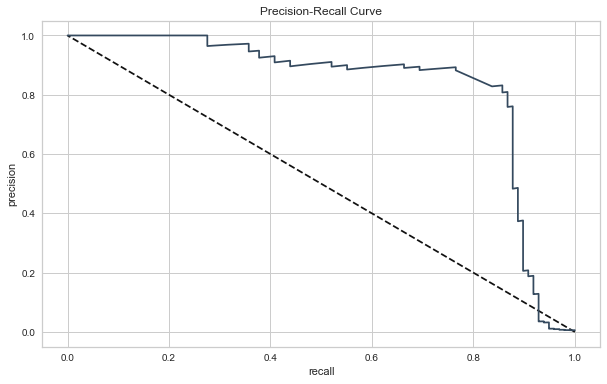

In [114]:
y_pred_proba = model.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot([1,0],[0,1],'k--')
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('Precision-Recall Curve')
plt.show() 

In [115]:
average_precision_score(y_test, y_pred_proba)

0.830429480302211

## 4. Model Deployement
You cooked the food in the kitchen and moved on to the serving stage. The question is how do you showcase your work to others? Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

***final ML model***

In [116]:
X.columns

Index(['V3', 'V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'Amount'], dtype='object')

In [117]:
rf_model = RandomForestClassifier(class_weight={1:25, 0:1}, max_depth=5, random_state=101)
rf_model.fit(X, y)

RandomForestClassifier(class_weight={0: 1, 1: 25}, max_depth=5,
                       random_state=101)

***final DL model***

In [118]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(64, input_dim = X_train.shape[1]))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(32))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(16))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(1, activation='sigmoid'))

opt = Adam(lr = 0.005)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['Recall'])

In [ ]:
early_stop=EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=128, epochs=200, verbose=1, callbacks=[early_stop])

Epoch 1/200
1781/1781 [==============================] - 6s 3ms/step - loss: 0.0139 - recall: 0.7310 - val_loss: 0.0043 - val_recall: 0.8163
Epoch 2/200
1781/1781 [==============================] - 5s 3ms/step - loss: 0.0035 - recall: 0.7589 - val_loss: 0.0041 - val_recall: 0.7347
Epoch 3/200
1781/1781 [==============================] - 5s 3ms/step - loss: 0.0033 - recall: 0.7817 - val_loss: 0.0567 - val_recall: 0.8163
Epoch 4/200
1781/1781 [==============================] - 5s 3ms/step - loss: 0.0033 - recall: 0.7640 - val_loss: 0.0041 - val_recall: 0.6122
Epoch 5/200
1781/1781 [==============================] - 4s 2ms/step - loss: 0.0032 - recall: 0.7716 - val_loss: 0.0039 - val_recall: 0.8163
Epoch 6/200
1781/1781 [==============================] - 5s 3ms/step - loss: 0.0032 - recall: 0.7766 - val_loss: 0.0060 - val_recall: 0.8265
Epoch 7/200
1781/1781 [==============================] - 4s 2ms/step - loss: 0.0032 - recall: 0.7817 - val_loss: 0.0053 - val_recall: 0.8163
Epoch 8/200
1

In [120]:
y_pred = model.predict(X_test) > 0.5

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[56834    30]
 [   12    86]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.74      0.88      0.80        98

    accuracy                           1.00     56962
   macro avg       0.87      0.94      0.90     56962
weighted avg       1.00      1.00      1.00     56962



### Save and Export the Model as .pkl


In [121]:
import joblib
joblib.dump(rf_model, open('rf_model.pkl', 'wb'))

In [122]:
model.save('DL_model.h5')

### Save and Export Variables as .pkl

In [123]:
# DL Model Scaler
joblib.dump(scaler, open("scaler.pkl", 'wb'))

### Prediction

In [124]:
from tensorflow.keras.models import load_model

In [125]:
DL_model = load_model('DL_model.h5')
scaler = joblib.load(open("scaler.pkl", "rb"))

rf_model = joblib.load(open("rf_model.pkl", "rb"))

In [126]:
samples = df.loc[540:544, X.columns]
samples

,V3,V4,V7,V10,V11,V12,V14,V16,V17,Amount
540,1.116,-0.052,0.749,0.073,0.058,0.640,-0.830,0.279,-0.084,1.980
541,-1.610,3.998,-2.537,-2.772,3.202,-2.900,-4.289,-1.141,-2.830,0.000
542,1.593,-1.389,-0.923,-1.270,-1.401,0.356,-0.473,-0.179,-0.817,46.680
543,1.753,-0.577,1.096,-0.743,-0.139,0.600,-0.381,0.473,-0.685,146.250
544,0.424,-2.020,0.630,3.334,1.474,0.121,-0.930,0.330,-1.063,7.300


In [127]:
samples = scaler.transform(samples)
samples

array([[8.56746945e-01, 2.49639852e-01, 2.69917597e-01, 5.10229053e-01,
        2.88751567e-01, 7.28310717e-01, 6.18129397e-01, 4.58223380e-01,
        7.28699900e-01, 7.70693110e-05],
       [8.09517207e-01, 4.29153988e-01, 2.49897472e-01, 4.51364707e-01,
        4.75697119e-01, 5.94894609e-01, 5.01833354e-01, 4.13074300e-01,
        6.48899709e-01, 0.00000000e+00],
       [8.65010542e-01, 1.90363531e-01, 2.59733354e-01, 4.82442759e-01,
        2.01970869e-01, 7.17611043e-01, 6.30139972e-01, 4.43656751e-01,
        7.07393768e-01, 1.81696739e-03],
       [8.67799182e-01, 2.26352920e-01, 2.72033397e-01, 4.93357723e-01,
        2.77034767e-01, 7.26802959e-01, 6.33225777e-01, 4.64393602e-01,
        7.11231749e-01, 5.69261956e-03],
       [8.44752700e-01, 1.62388641e-01, 2.69191745e-01, 5.77710370e-01,
        3.72967119e-01, 7.08764152e-01, 6.14786590e-01, 4.59858349e-01,
        7.00234007e-01, 2.84144429e-04]])

In [128]:
(DL_model.predict(samples) > 0.5).astype('int32')

array([[0],
       [1],
       [0],
       [0],
       [0]], dtype=int32)

In [129]:
df.loc[540:544, 'Class']

540    0
541    1
542    0
543    0
544    0
Name: Class, dtype: int64

In [130]:
# Prediction with Random Forest 
samples = df.loc[540:544, X.columns]
rf_model.predict(samples)

array([0, 1, 0, 0, 0])